![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [7]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
#df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
#df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')
#sample_submission = pd.read_csv('sample_submission.csv')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [9]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [11]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [12]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [13]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [61]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [63]:
Restaurant_id = data.Restaurant_id

Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [21]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
26511,id_2223,Berlin,NaN,2225.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187323-d1358783-Reviews-Ei...,d1358783,1,4.5
41047,id_1966,Lyon,"['Italian', 'Pizza', 'Fast Food']",2006.0,NaN,NaN,"[[], []]",/Restaurant_Review-g207360-d7894408-Reviews-La...,d7894408,1,4.0
47499,id_3305,Paris,"['French', 'Vegetarian Friendly']",3306.0,$,150.0,"[['Great food', 'Good value for money, tasty f...",/Restaurant_Review-g187147-d5895229-Reviews-Fl...,d5895229,1,4.0
17122,id_870,Madrid,"['Steakhouse', 'Mediterranean', 'European', 'S...",871.0,$$$$,284.0,"[['Supposed to be the best steaks in Madrid', ...",/Restaurant_Review-g187514-d990855-Reviews-Pel...,d990855,1,4.0
6785,id_6785,Edinburgh,"['Italian', 'Mediterranean', 'European', 'Wine...",30.0,$$ - $$$,226.0,"[['Wine tasting', 'Great place'], ['01/12/2018...",/Restaurant_Review-g186525-d10496902-Reviews-V...,d10496902,0,0.0


In [22]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [ ]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [ ]:
data['Number_of_Reviews_isNAN']

In [23]:
# Посмотрим на распределение значений признака 'Number of Reviews'
display(data['Number of Reviews'].mean())
display(data['Number of Reviews'].median())
display(data['Number of Reviews'].min())

124.47119658119658

33.0

2.0

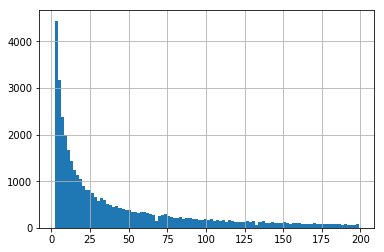

In [148]:
data[data['Number of Reviews']<200]['Number of Reviews'].hist(bins=100)

116.56904

28.0

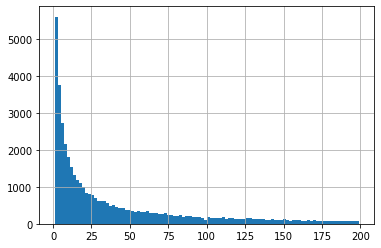

In [64]:
# Заполнение пропусков средним или медианным значением сильно исказит характер 
# распределения данных. Заполним пропуски единицами, характер распределения при этом
# изменится мало, хотя изменятся статистические характеристики.

data['Number of Reviews'].fillna(1, inplace=True)

display(data['Number of Reviews'].mean())
display(data['Number of Reviews'].median())

data[data['Number of Reviews']<200]['Number of Reviews'].hist(bins=100)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [150]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [65]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

City_dummies = pd.get_dummies(data.City, drop_first=False)
data = pd.concat([data, City_dummies], axis=1)

In [157]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels',
       'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg',
       'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg',
       'Lyon', 'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris',
       'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich'],
      dtype='object')

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [158]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.sample(5)

### Обработаем признак **Cuisine Style**.
Заполним пропуски значением 'Other', уберем квадратные скобки и кавычки в начале и конце строки.
Затем разделим значения в ячейках и, убрав лишние кавычки, преобразуем в список.

In [66]:
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Other']").apply(
    lambda x: x[2:-2]) # убираем по 2 символа по краям ("['" и "']")

data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.split("', '"))

data.head(3)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Сколько типов кухонь представлено в наборе данных?

def cuisines_count(a):
    for i in a:
        if i in cuisines_dict:
            cuisines_dict[i] += 1
        else:
            cuisines_dict[i] = 1
    return cuisines_dict


cuisines_dict = {} 
# ключи словаря - названия кухонь, значения - количество упоминаний

data['Cuisine Style'].apply(cuisines_count)

cuisines_series = pd.Series(cuisines_dict).sort_values(ascending=False)
#print(cuisines_dict)

len(cuisines_series)-1 # За вычетом значений 'Other' 

125

In [161]:
# Какая кухня представлена в наибольшем количестве ресторанов?
cuisines_series[:10]

Vegetarian Friendly    14021
European               12561
Other                  11590
Mediterranean           7820
Italian                 7433
Vegan Options           5684
Gluten Free Options     5185
Bar                     4094
French                  3970
Asian                   3786
dtype: int64

### Обработаем признак **Reviews**.

В столбце Reviews имеем ячейки без отзывов, с 1 отзывом и 2 отзывами. 

Очищаем данные: 
  1. заменим ячейки '[[], []]' на None, уберем квадратные скобки, заменим двойные кавычки на одинарные, 'nan' - на "'nan'". 
  2. уберем кавычки в начале и конце строки, затем разделим значения в ячейках и, убрав лишние (внутренние) кавычки, преобразуем в список.

In [68]:
data.Reviews = data.Reviews.apply(
    lambda x: '[[], []]' if type(x)!=str else x)

data.Reviews = data.Reviews.apply(
    lambda x: None if x == '[[], []]' else x.replace(
        '[','').replace(']','').replace('"',"'").replace('nan',"'nan'"))

data.Reviews = data.Reviews.apply(
    lambda x: None if x==None else x[1:-1].split("', '"))

# Посчитаем распределение по количеству отзывов:
df_temp = data.copy()
df_temp['Rev_count'] = data.Reviews.apply(
    lambda x: int(len(x)) if x!= None else 0)

print('Количество строк с 2 отзывами:',\
      df_temp.query('Rev_count==4')['Reviews'].shape[0])
print('Количество строк с 1 отзывом',\
      df_temp.query('Rev_count==2')['Reviews'].shape[0])
print('Количество пустых строк:', data.Reviews.isna().sum())

Количество строк с 2 отзывами: 36206
Количество строк с 1 отзывом 5680
Количество пустых строк: 8114


### Выделим временные показатели

In [69]:
from datetime import datetime, timedelta

# Функция для создания отдельных столбцов с датами отзывов
def dates(x):
    if x == None:
        return [x, x]
    elif len(x) == 2: 
        # При наличии только 1 отзыва ставим во 2-й столбец None!!!
        return [datetime.strptime(x[1], '%m/%d/%Y'), None]
    else:
        return [datetime.strptime(x[-2], '%m/%d/%Y'
                                 ), datetime.strptime(x[-1],'%m/%d/%Y')]


# Создадим столбец с датами отзывов
data['Rev_dates'] = data.Reviews.apply(dates)

# Разделим даты на 2 столбца:
data['Rev_date1'] = data.Rev_dates.apply(lambda x: x[0])
data['Rev_date2'] = data.Rev_dates.apply(lambda x: x[1])

# Удалим столбец Rev_dates за ненадобностью
data = data.drop(['Rev_dates'], axis = 1)

In [164]:
data[data.Rev_date2.isna()].sample()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Rev_date1,Rev_date2
31263,id_3057,Rome,"[Italian, French]",3058.0,$$ - $$$,40.0,None,/Restaurant_Review-g187791-d12347521-Reviews-C...,d12347521,1,...,0,0,0,1,0,0,0,0,NaT,NaT


In [165]:
# Когда был оставлен самый свежий отзыв?

display(data.Rev_date1.max())
display(data.Rev_date2.max())

Timestamp('2018-02-26 00:00:00')

Timestamp('2018-02-26 00:00:00')

In [166]:
# Когда был оставлен самый давний отзыв?

display(data.Rev_date1.min())
display(data.Rev_date2.min())

Timestamp('2004-04-21 00:00:00')

Timestamp('2007-11-14 00:00:00')

In [70]:
data1 = data.copy()

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Restaurant_id      50000 non-null  object        
 1   City               50000 non-null  object        
 2   Cuisine Style      50000 non-null  object        
 3   Ranking            50000 non-null  float64       
 4   Price Range        32639 non-null  object        
 5   Number of Reviews  50000 non-null  float64       
 6   Reviews            41886 non-null  object        
 7   URL_TA             50000 non-null  object        
 8   ID_TA              50000 non-null  object        
 9   sample             50000 non-null  int64         
 10  Rating             50000 non-null  float64       
 11  Amsterdam          50000 non-null  uint8         
 12  Athens             50000 non-null  uint8         
 13  Barcelona          50000 non-null  uint8         
 14  Berlin

## Добавим новые числовые признаки:

**Cuisine_Variety** - количество видов кухни в меню

**City_Competition** - ординальная оценка конкурентности среды. За каждые 500 ресторанов в конкретном городе (количество рассчитано по данным столбца *City*) присваивается 1 балл; результат увеличивается на 1 (во избежание нулевых значений).

**Price_Grade** - ценовой диапазон, приведенный к ординальному виду: **`'$'`** соответстует **1**, **`'$$-$$$'`** соответстует **2**, **`'$$$$'`** соответстует **3**. Вместо `NaN` проставим **4** (может, в отсуствии данных о ценовом диапазоне есть какой-то умысел?).

**Rank_Norm** - нормализованный рэнкинг. Определяется следующим образом: разница между количеством ресторанов в городе (найденным не по данным *City*, но по максимальному месту в городе согласно данным *Ranking*) и занимаемым местом (*Ranking*) делится на количество ресторанов в городе и умножается на 100. Результат увеличивается на 1 (во избежание нулевых значений).

**Rev_delta** - разница по времени между двумя отзывами (в днях).

**Rev_fresh** - сколько дней прошло с даты последнего отзыва.

**Has_Local** - указывает на то, есть ли среди предлагаемых рестораном видов кухня, "соответствующая" стране нахождения.

### Cuisine_Variety

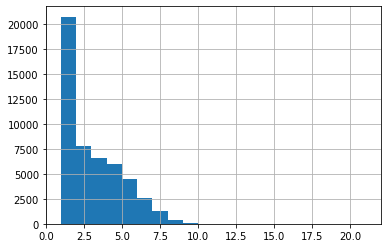

In [72]:
data['Cuisine_Variety'] = data['Cuisine Style'].apply(lambda x: len(x))

data.Cuisine_Variety.hist(bins=20)

### City_Competition

In [73]:
City_dict = {}
for i in range(len(data.City.value_counts())):
    City_dict[data.City.value_counts().index[i]
             ] = data.City.value_counts()[i]
print(City_dict)    

data['City_Competition'] = data.City.apply(lambda x: City_dict[x]//500+1)

{'London': 7193, 'Paris': 6108, 'Madrid': 3813, 'Barcelona': 3395, 'Berlin': 2705, 'Milan': 2694, 'Rome': 2589, 'Prague': 1816, 'Lisbon': 1647, 'Vienna': 1443, 'Amsterdam': 1372, 'Brussels': 1314, 'Hamburg': 1186, 'Munich': 1145, 'Lyon': 1126, 'Stockholm': 1033, 'Budapest': 1021, 'Warsaw': 925, 'Dublin': 836, 'Copenhagen': 819, 'Athens': 776, 'Edinburgh': 745, 'Zurich': 685, 'Oporto': 642, 'Geneva': 590, 'Krakow': 554, 'Oslo': 488, 'Helsinki': 475, 'Bratislava': 380, 'Luxembourg': 263, 'Ljubljana': 222}


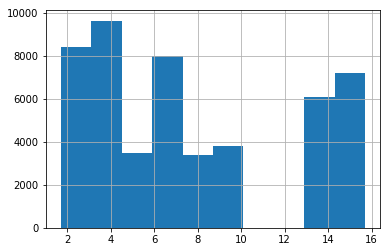

In [175]:
data.City_Competition.hist(bins=10, align='right')

### Price_Grade

In [177]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [74]:
# Заполним пустые ячейки числом 4
# Может, в отсутствии информации об уровне цен есть какой-то умысел?

 
def price(x):  
    if x == '$': 
        return int(1)
    elif x == '$$ - $$$':
        return int(2) 
    elif x == '$$$$':
        return int(3)
    else:
        return int(4)


data['Price_Grade'] = data['Price Range'].apply(lambda x: price(x))
data.Price_Grade.value_counts()

2    23041
4    17361
1     7816
3     1782
Name: Price_Grade, dtype: int64

Также попробуем оценить влияние **Price Range** с помощью dummie-переменных.

In [75]:
# С помощью метода get_dummies преобразуем признак 'Price_Range' в 
# dummy-переменные.

Price_dummies = pd.get_dummies(data['Price Range'], drop_first=False)

# Добавим в датафрейм получившиеся признаки.
data['$'] = Price_dummies['$']
data['$$_$$$'] = Price_dummies['$$ - $$$']
data['$$$$'] = Price_dummies['$$$$']

# Удалим столбец 'Price_Range'
data = data.drop(['Price Range'], axis = 1)

### Rank_Norm 

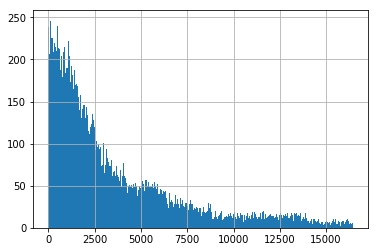

In [185]:
data.Ranking.hist(bins=1000)

In [76]:
# Функция для исключения нулевых значений
def increaser(x):
    if abs(x)<0.01:
        return int(0.01)
    else:
        return x
    
    
Rank_dict = {}
# Словарь, ключами которого являются названия городов, значениями - 
# количество ресторанов в городской агломерации на основании столбца
# Ranking (принимаем максимальное значение Ranking за это количество)


for i in range(len(data.City.value_counts())):
    Rank_dict[data.City.value_counts().index[i]] = data[
        data.City==data.City.value_counts().index[i]].Ranking.max()


data['temp'] = data.City.apply(lambda x: Rank_dict[x])
data['Rank_Norm'] = round(100 *(data.temp - data.Ranking) / data.temp, 1)

data['Rank_Norm'] = data.Rank_Norm.apply(increaser)
data = data.drop('temp', axis = 1)

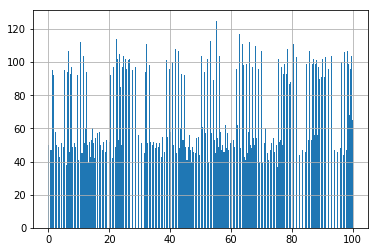

In [191]:
data.Rank_Norm.hist(bins=1000)

### Rev_delta

In [77]:
data['Rev_delta'] = abs(data.Rev_date1 - data.Rev_date2)

print(data.Rev_delta.median())
print(data.Rev_delta.mean())

data['Rev_delta'].isna().sum()

67 days 00:00:00
142 days 13:10:19.057614


13794

In [78]:
# Заполним пустые ячейки НУЛЕВЫМ значением
data['Rev_delta'].fillna(data['Rev_delta'].min(), inplace=True)
data['Rev_delta'].isna().sum()

0

### Rev_fresh

In [79]:
# Функция для перевода datetime в число
def date_to_int(x):
    if str(x)=='NaT':
        return x
    else:
        return int(str(x)[:10].replace('-',''))


# Переведем текущую дату в формат ГГГГ-ММ-ДД
today = datetime.strptime(datetime.now().strftime("%Y-%m-%d"),"%Y-%m-%d")
data['Rev_fresh'] = today - data.Rev_date1

# Заполним пустые ячейки медианным значением
data['Rev_fresh'].fillna(data['Rev_fresh'].median(), inplace=True)

### Has_Local

In [80]:
# Добавим столбец 'Local_Cuisine',содержащий информацию о кухне,наиболее
# "соответствующей" местоположению ресторана (Прага - чешская и т.д.).

Country_dict={
    'London': 'British', 'Paris': 'French', 'Madrid': 'Spanish', 
    'Barcelona': 'Spanish', 'Berlin': 'German', 'Milan': 'Italian',
    'Rome': 'Italian', 'Prague': 'Czech', 'Lisbon': 'Portuguese', 
    'Vienna': 'Austrian', 'Amsterdam': 'Dutch', 'Brussels': 'Belgian',
    'Hamburg': 'German', 'Munich': 'German', 'Lyon': 'French', 
    'Stockholm': 'Swedish', 'Budapest': 'Hungarian', 'Warsaw': 'Polish',
    'Dublin': 'Irish', 'Copenhagen': 'Danish', 'Athens': 'Greek',
    'Edinburgh': 'Scottish', 'Zurich': 'Swiss', 'Oporto': 'Portuguese',
    'Geneva': 'Swiss', 'Krakow': 'Polish', 'Oslo': 'Norwegian', 
    'Helsinki': 'Scandinavian', 'Bratislava': 'Czech', 
    'Luxembourg': 'Belgian', 'Ljubljana': 'Slovenian'}


def region(x):
    return Country_dict[x]


data['Local_Cuisine'] = data.City.apply(region)

In [81]:
data['Has_Local'] = data['Local_Cuisine']

for i in range(len(data['Local_Cuisine'])):
    if data['Local_Cuisine'].loc[i] in data['Cuisine Style'].loc[i]:
        data['Has_Local'].loc[i] = 1
    else:
        data['Has_Local'].loc[i] = 0
    
data['Has_Local'] = data.Has_Local.apply(lambda x: int(x))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [224]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels',
       'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg',
       'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg',
       'Lyon', 'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris',
       'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich',
       'Rev_date1', 'Rev_date2', 'Cuisine_Variety', 'City_Competition',
       'Price_Grade', '$', '$$_$$$', '$$$$', 'Rank_Norm', 'Rev_delta',
       'Rev_fresh', 'Local_Cuisine', 'Has_Local'],
      dtype='object')

### Резервная копия датафрейма

In [82]:
data2 = data.copy()

In [83]:
# Удалим ненужные столбцы и сохраним копию датафрейма

data = data.drop(['Restaurant_id','City','Reviews','URL_TA','ID_TA',
                  'Rev_date1','Rev_date2','Local_Cuisine',
                  'Cuisine Style'
                 ], axis=1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Ranking            50000 non-null  float64        
 1   Number of Reviews  50000 non-null  float64        
 2   sample             50000 non-null  int64          
 3   Rating             50000 non-null  float64        
 4   Amsterdam          50000 non-null  uint8          
 5   Athens             50000 non-null  uint8          
 6   Barcelona          50000 non-null  uint8          
 7   Berlin             50000 non-null  uint8          
 8   Bratislava         50000 non-null  uint8          
 9   Brussels           50000 non-null  uint8          
 10  Budapest           50000 non-null  uint8          
 11  Copenhagen         50000 non-null  uint8          
 12  Dublin             50000 non-null  uint8          
 13  Edinburgh          50000 non-null  uint8      

### Переведём формат timedelta в число с помощью регулярных выражений

In [85]:
import re

def regex(x):
    reg = re.compile(r'\D?\d{,4}')
    return int(reg.search(str(x)).group())

data['Rev_delta'] = data.Rev_delta.apply(regex)

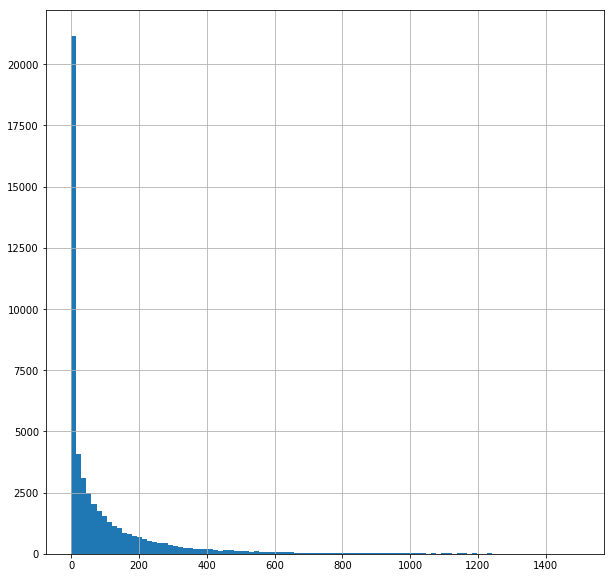

In [354]:
data[data['Rev_delta']<1500].Rev_delta.hist(bins=100)

In [86]:
data['Rev_fresh'] = data.Rev_fresh.apply(regex)

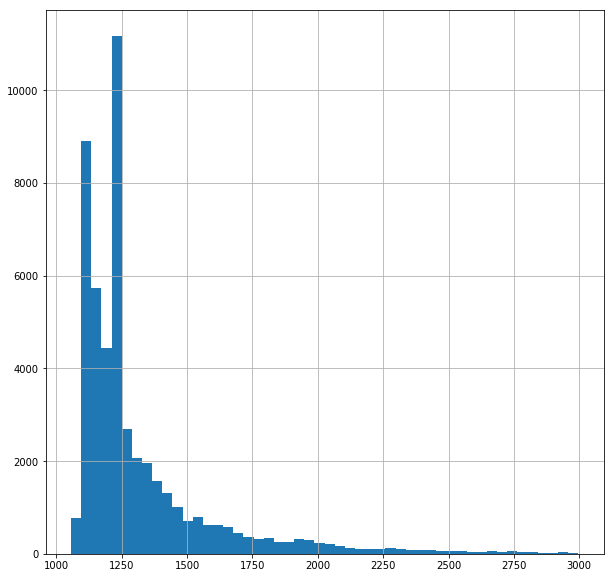

In [356]:
data[data.Rev_fresh<3000].Rev_fresh.hist(bins=50)

In [256]:
data.columns

Index(['Ranking', 'Number of Reviews', 'sample', 'Rating', 'Amsterdam',
       'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels', 'Budapest',
       'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki',
       'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Lyon',
       'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris', 'Prague',
       'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich', 'Cuisine_Variety',
       'City_Competition', 'Price_Grade', '$', '$$_$$$', '$$$$', 'Rank_Norm',
       'Rev_delta', 'Rev_fresh', 'Has_Local'],
      dtype='object')

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
Ranking              50000 non-null float64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
Amsterdam            50000 non-null uint8
Athens               50000 non-null uint8
Barcelona            50000 non-null uint8
Berlin               50000 non-null uint8
Bratislava           50000 non-null uint8
Brussels             50000 non-null uint8
Budapest             50000 non-null uint8
Copenhagen           50000 non-null uint8
Dublin               50000 non-null uint8
Edinburgh            50000 non-null uint8
Geneva               50000 non-null uint8
Hamburg              50000 non-null uint8
Helsinki             50000 non-null uint8
Krakow               50000 non-null uint8
Lisbon               50000 non-null uint8
Ljubljana            50000 non-null uint8
London               50000 non-null uint8
Lux

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

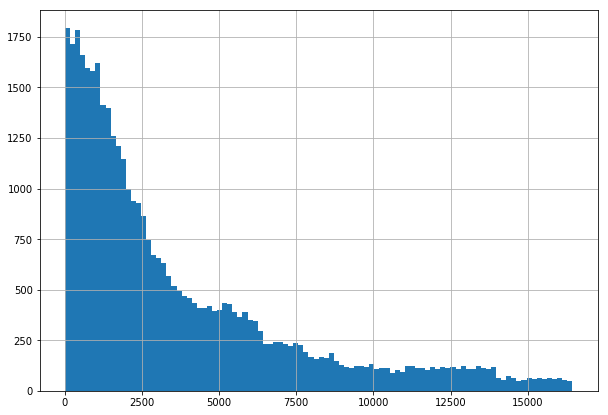

In [235]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

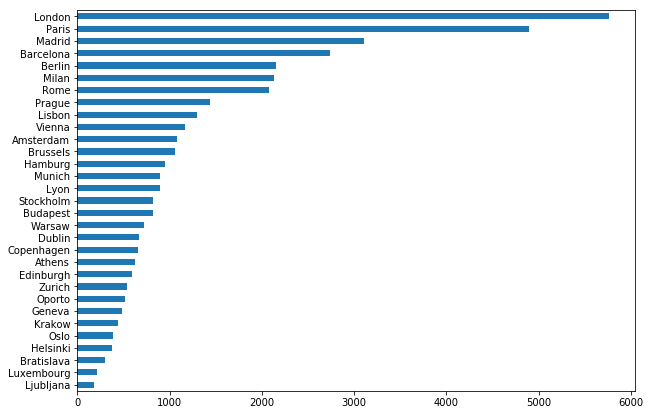

In [236]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

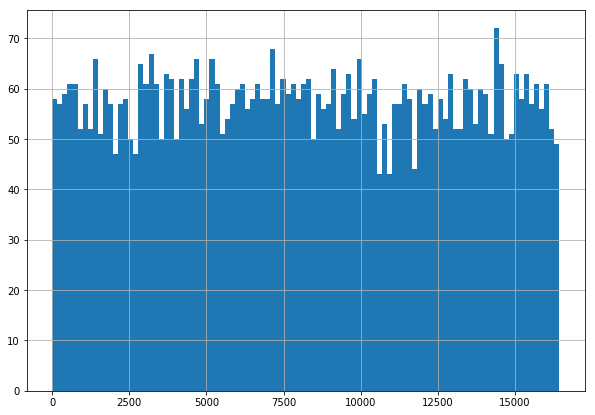

In [237]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

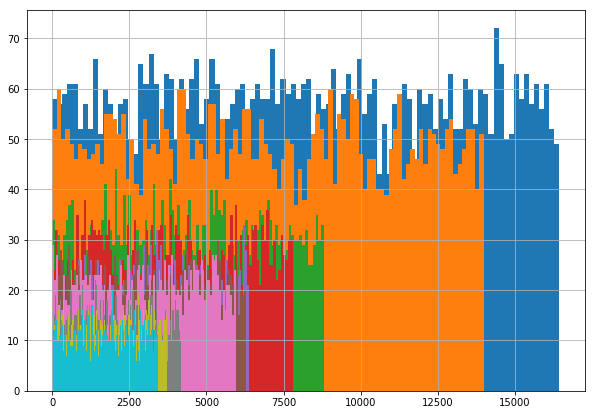

In [238]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

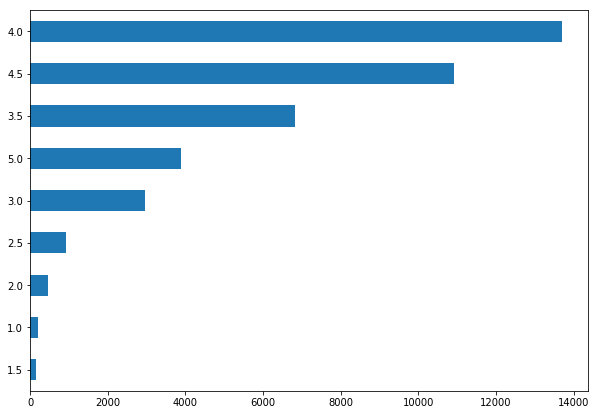

In [239]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

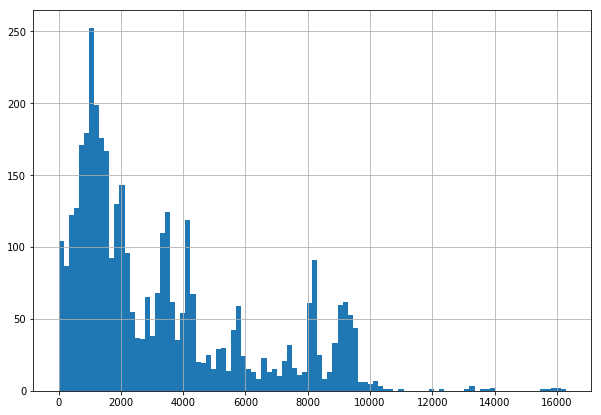

In [240]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

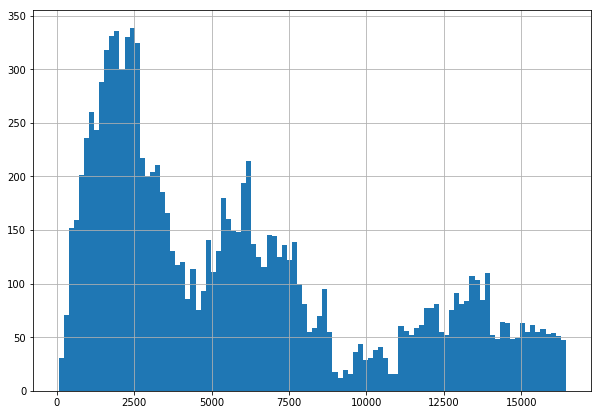

In [241]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [260]:
data.columns

Index(['Ranking', 'Number of Reviews', 'sample', 'Rating', 'Amsterdam',
       'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels', 'Budapest',
       'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki',
       'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Lyon',
       'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris', 'Prague',
       'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich', 'Cuisine_Variety',
       'City_Competition', 'Price_Grade', '$', '$$_$$$', '$$$$', 'Rank_Norm',
       'Rev_delta', 'Rev_fresh', 'Has_Local'],
      dtype='object')

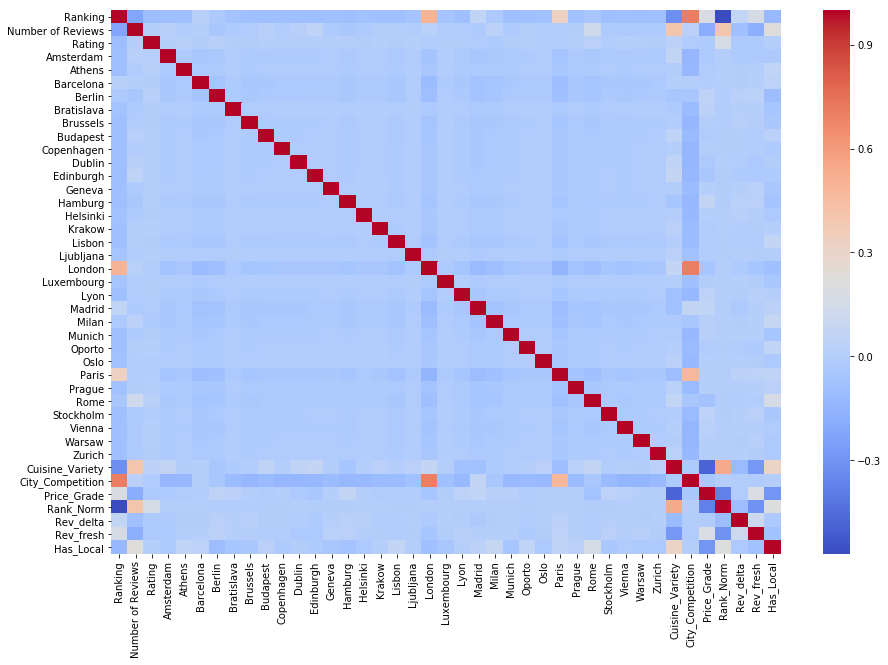

In [262]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample','$', '$$_$$$', '$$$$'
                      ], axis=1).corr(),cmap = 'coolwarm')


Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

In [303]:
# Выделим наиболее коррелирующие с целевой переменной факторы

abs(data.drop(['sample'],axis=1
             ).corr().loc['Rating']).sort_values(ascending=False)[:20]

Rating               1.000000
Rank_Norm            0.168780
Ranking              0.109897
Cuisine_Variety      0.034506
Rev_fresh            0.030632
Rome                 0.027527
Rev_delta            0.025971
$                    0.023520
Milan                0.023233
Price_Grade          0.022047
$$$$                 0.018409
Athens               0.016852
Madrid               0.016232
City_Competition     0.014428
Berlin               0.012834
Has_Local            0.012030
Number of Reviews    0.011006
Stockholm            0.010417
Vienna               0.010188
Oporto               0.009654
Name: Rating, dtype: float64

In [306]:
data_short = data.drop([
    'sample','Amsterdam','Barcelona','Bratislava','Brussels', 
    'Budapest','Copenhagen','Dublin','Edinburgh','Geneva',
    'Hamburg','Helsinki','Krakow','Lisbon','Ljubljana','London', 
    'Luxembourg','Lyon','Munich','Oslo', 
    'Paris','Prague','Warsaw','Zurich',
    '$', '$$_$$$', '$$$$'], axis=1)

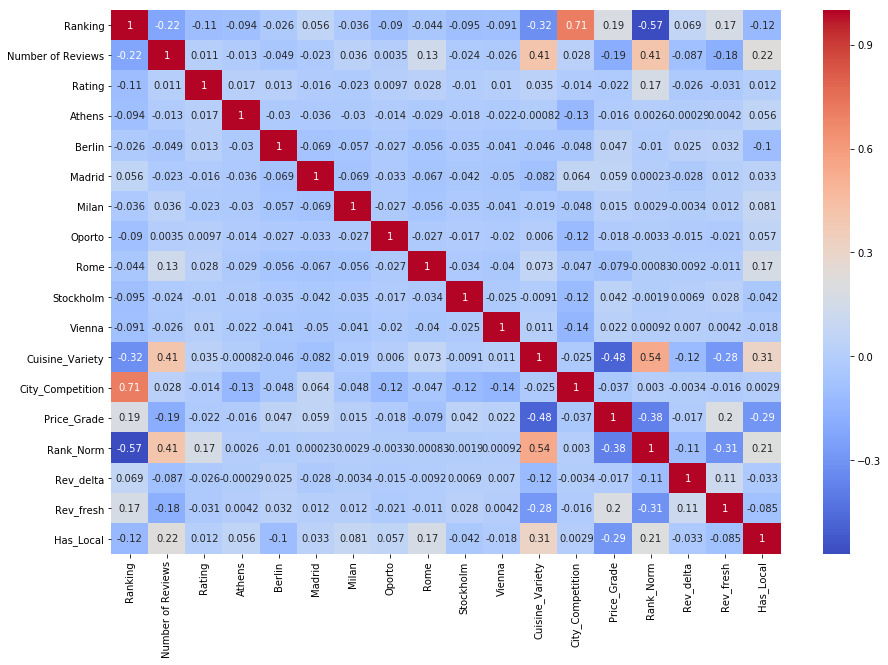

In [307]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data_short.corr(), annot = True, cmap = 'coolwarm')

# Model 
Сам ML

In [88]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [89]:
# Для гарантированной идентификации перед разбиением массива вернем 'Restaurant_id'
data['Restaurant_id'] = Restaurant_id

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            50000 non-null  float64
 1   Number of Reviews  50000 non-null  float64
 2   sample             50000 non-null  int64  
 3   Rating             50000 non-null  float64
 4   Amsterdam          50000 non-null  uint8  
 5   Athens             50000 non-null  uint8  
 6   Barcelona          50000 non-null  uint8  
 7   Berlin             50000 non-null  uint8  
 8   Bratislava         50000 non-null  uint8  
 9   Brussels           50000 non-null  uint8  
 10  Budapest           50000 non-null  uint8  
 11  Copenhagen         50000 non-null  uint8  
 12  Dublin             50000 non-null  uint8  
 13  Edinburgh          50000 non-null  uint8  
 14  Geneva             50000 non-null  uint8  
 15  Hamburg            50000 non-null  uint8  
 16  Helsinki           500

In [96]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

In [99]:
train_Restaurant_id = train_data['Restaurant_id']
train_data = train_data.drop(['Restaurant_id'], axis=1)

test_Restaurant_id = test_data['Restaurant_id']
test_data = test_data.drop(['Restaurant_id'], axis=1)

In [100]:
y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [101]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых 
# данных выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [102]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 44), (40000, 44), (40000, 43), (32000, 43), (8000, 43))

In [104]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)


# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)


# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


MAE: 0.20146187499999996


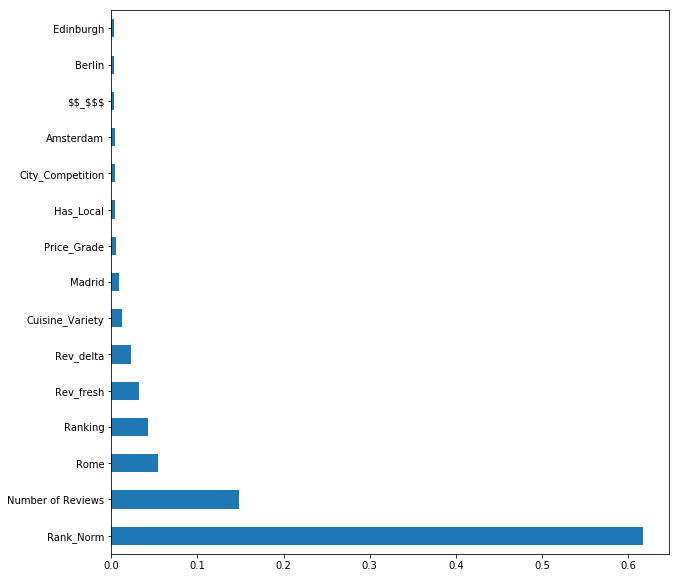

In [381]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [382]:
correl = abs(data.drop(['sample'],axis=1
                      ).corr().loc['Rating'])

correl[correl>=0.01].sort_values(ascending=False)

Rating               1.000000
Rank_Norm            0.168780
Ranking              0.109897
Cuisine_Variety      0.034506
Rev_fresh            0.030632
Rome                 0.027527
Rev_delta            0.025971
$                    0.023520
Milan                0.023233
Price_Grade          0.022047
$$$$                 0.018409
Athens               0.016852
Madrid               0.016232
City_Competition     0.014428
Berlin               0.012834
Has_Local            0.012030
Number of Reviews    0.011006
Stockholm            0.010417
Vienna               0.010188
Name: Rating, dtype: float64

In [105]:
data3 = data.copy()

# Submission
Если все устраевает - готовим Submission на кагл

In [107]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,...,Cuisine_Variety,City_Competition,Price_Grade,$,$$_$$$,$$$$,Rank_Norm,Rev_delta,Rev_fresh,Has_Local
1736,1342.0,52.0,0.0,0,0,0,0,0,0,0,...,3,3,2,0,1,0,45.5,74,1248,0
760,4629.0,27.0,0.0,0,0,1,0,0,0,0,...,3,7,2,0,1,0,40.6,207,1328,0
9072,2401.0,24.0,0.0,0,0,1,0,0,0,0,...,5,7,2,0,1,0,69.2,36,1333,0
343,711.0,596.0,0.0,0,0,1,0,0,0,0,...,5,7,3,0,0,1,90.9,7,1189,1
4179,1333.0,23.0,0.0,0,0,0,0,0,0,0,...,1,2,4,0,0,0,32.0,12,1141,0
3602,2371.0,18.0,0.0,0,0,0,0,0,0,0,...,2,4,2,0,1,0,43.4,177,1191,0
1390,4892.0,251.0,0.0,0,0,1,0,0,0,0,...,3,7,1,1,0,0,37.2,164,1268,1
5603,7208.0,12.0,0.0,0,0,0,0,0,0,0,...,1,8,4,0,0,0,18.2,0,2318,0
692,3961.0,127.0,0.0,0,0,0,0,0,0,0,...,2,15,2,0,1,0,75.9,69,1132,0
8132,759.0,14.0,0.0,0,0,0,0,0,0,0,...,4,2,2,0,1,0,48.9,421,1144,1


In [108]:
test_data = test_data.drop(['Rating'], axis=1)

In [ ]:
test_data

In [110]:
sample_submission.head()

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [111]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [112]:
predict_submission

array([3.125, 4.225, 4.415, ..., 3.055, 4.495, 4.305])

In [114]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,3.125
1,id_1,4.225
2,id_2,4.415
3,id_3,4.270
4,id_4,4.480


In [117]:
test_data.to_csv('kaggle_task.csv', index=False)
test_data.head(5)

,Ranking,Number of Reviews,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,...,Cuisine_Variety,City_Competition,Price_Grade,$,$$_$$$,$$$$,Rank_Norm,Rev_delta,Rev_fresh,Has_Local
0,12963.0,4.0,0,0,0,0,0,0,0,0,...,2,13,2,0,1,0,7.3,0,1224,0
1,106.0,97.0,0,0,0,0,0,0,0,0,...,5,1,2,0,1,0,90.7,37,1139,1
2,810.0,28.0,0,0,0,0,0,0,0,0,...,1,2,2,0,1,0,54.1,22,1116,0
3,1669.0,202.0,0,0,0,0,0,0,0,0,...,5,15,3,0,0,1,89.9,14,1138,0
4,37.0,162.0,0,0,0,0,1,0,0,0,...,6,1,3,0,0,1,95.8,15,1074,0


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
